# Problem Statement
Predict the salary if the employee using the features provided in the data. 

In [31]:
import pandas as pd
import numpy as np

In [32]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv")

In [33]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [34]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

About the columns

1.rank
It shows the service they are providing like prof or asstprof etc.

2.discipline
it shows the rank of discipline they have.

3.yrs.since.phd
it shows since how many years that person completed they phd degree

4.yrs.service
it shows the working experience of the paticular person

5.sex
it shows the person is male or female

6.salary
it shows the salary they got

In [35]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

# EDA

Scatterplot

<AxesSubplot:xlabel='discipline', ylabel='rank'>

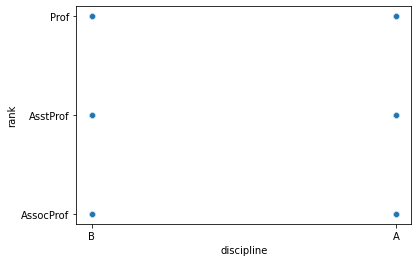

In [36]:
import seaborn as sns
sns.scatterplot(x="discipline",y="rank",data=df)

<AxesSubplot:xlabel='yrs.since.phd', ylabel='rank'>

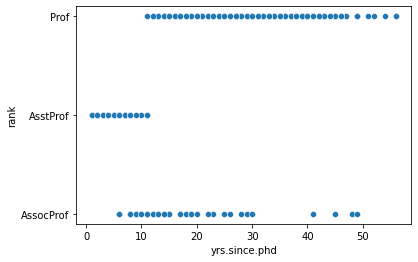

In [37]:
sns.scatterplot(x="yrs.since.phd",y="rank",data=df)

we can see in the range of yrs since phd between 0 to 13

<AxesSubplot:xlabel='yrs.service', ylabel='rank'>

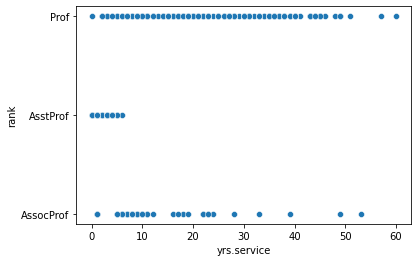

In [38]:
sns.scatterplot(x="yrs.service",y="rank",data=df)

we can see in the range of yrs of service between 0 to 10

<AxesSubplot:xlabel='sex', ylabel='rank'>

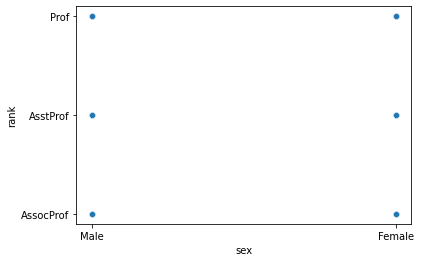

In [39]:
sns.scatterplot(x="sex",y="rank",data=df)

<AxesSubplot:xlabel='salary', ylabel='rank'>

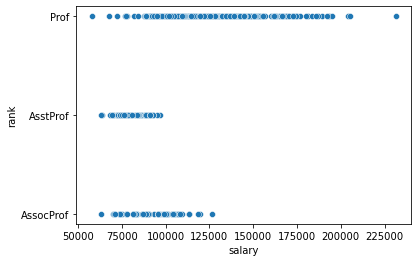

In [40]:
sns.scatterplot(x="salary",y="rank",data=df)

we can see in the range of salary between 60000 to 100000

# Correlation

In [41]:
df.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


<AxesSubplot:>

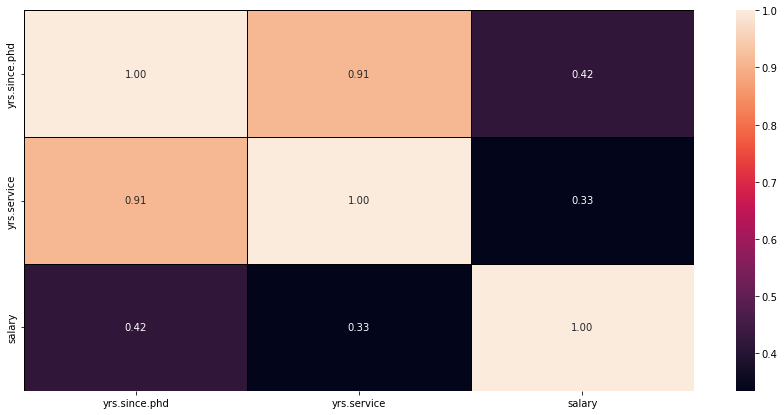

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidth=0.5, linecolor="black", fmt=".2f")

# Outcome of Correlation

All the columnsv of dataset is positivly correlated to the target columns

max correlation with :- yrs.since.phd
    
min correlation with :- yrs.service


# Describing Dataset

In [43]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


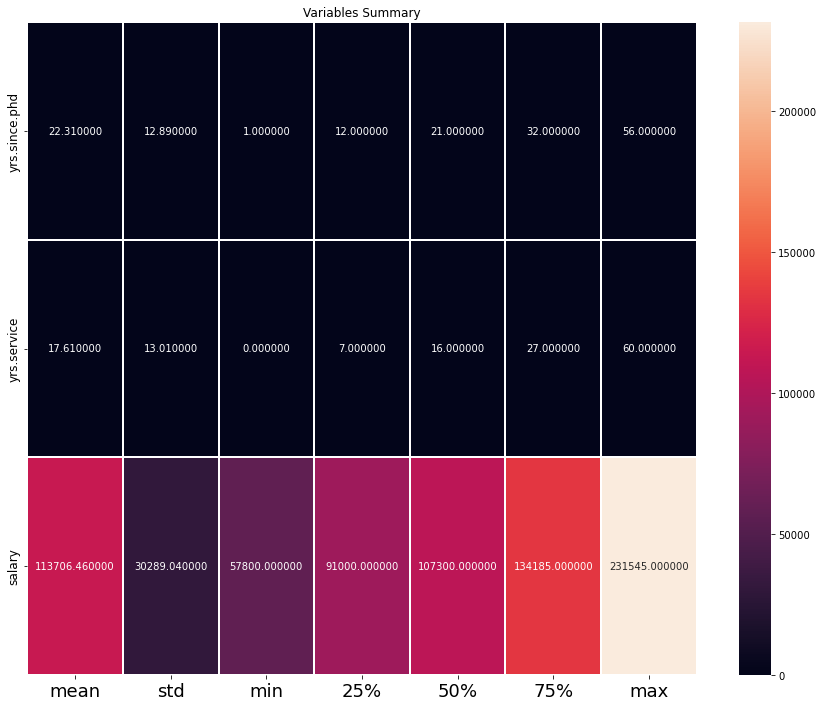

In [44]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables Summary")
plt.show()

# Outcome of describe datasets

Salary

mean = 113706.460000
std = 30289.040000
min = 57800.000000
max = 231545.000000

yrs.service

mean = 17.610000
std = 13.010000
min = 0.000000
max = 60.000000

yrs.since.phd

mean = 22.310000
std = 12.890000
min = 1.000000
max = 56.000000

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [46]:
df.skew()

C:\Users\Nirav\AppData\Local\Temp/ipykernel_17376/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


yrs.since.phd    0.300880
yrs.service      0.650569
salary           0.714568
dtype: float64

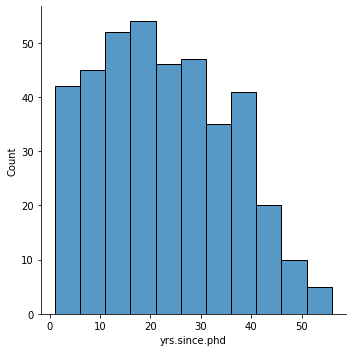

In [47]:
sns.displot(df["yrs.since.phd"])

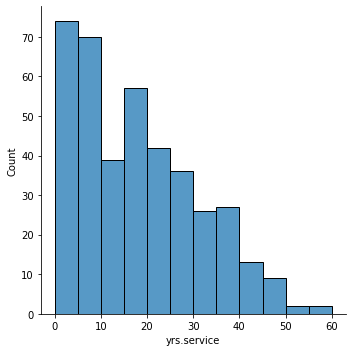

In [48]:
sns.displot(df["yrs.service"])

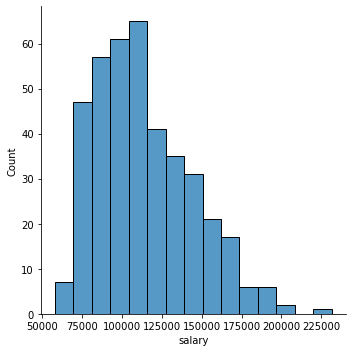

In [49]:
sns.displot(df["salary"])

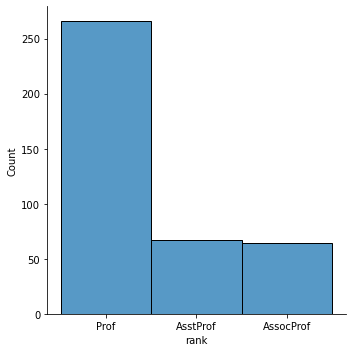

In [50]:
sns.displot(df["rank"])

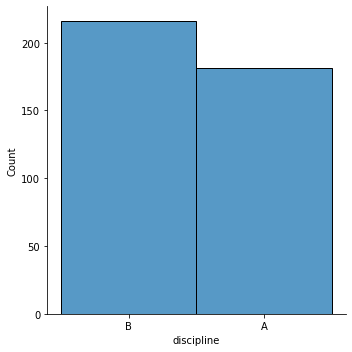

In [51]:
sns.displot(df["discipline"])

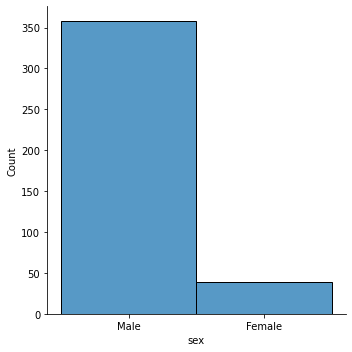

In [52]:
sns.displot(df["sex"])

# Encoding of Dataframe

In [55]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [56]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [57]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


# Describe the dataset

In [58]:
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


<AxesSubplot:>

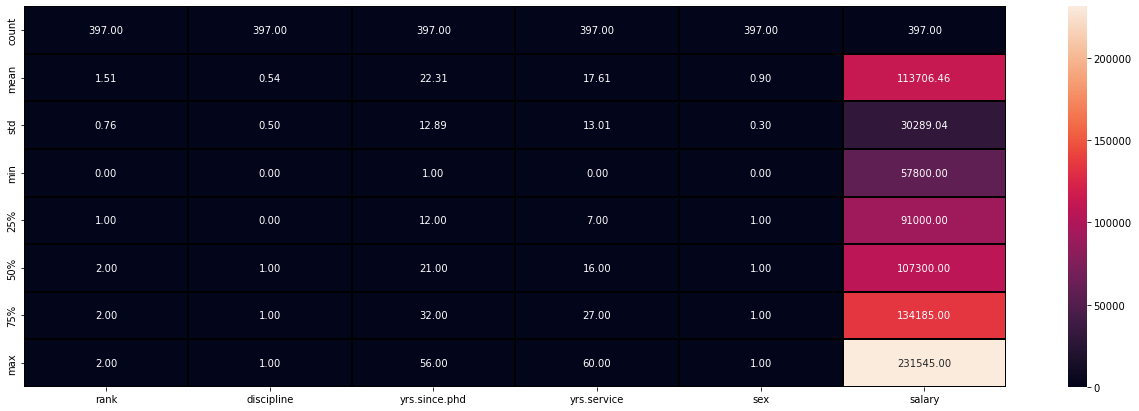

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

# Correlation with target columns

In [61]:
df.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.525500,0.447499,0.132492,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.003724,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.132492,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.522207,0.156084,0.419231,0.334745,0.138610,1.000000


<AxesSubplot:>

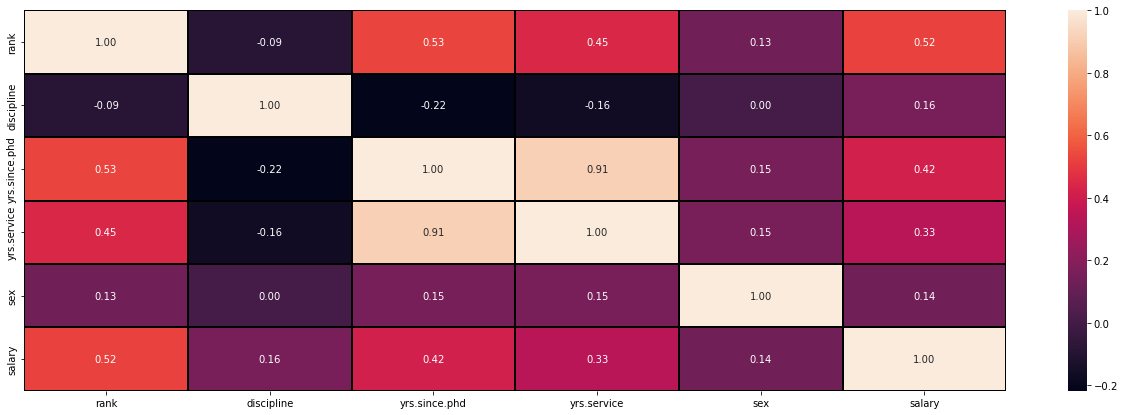

In [62]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

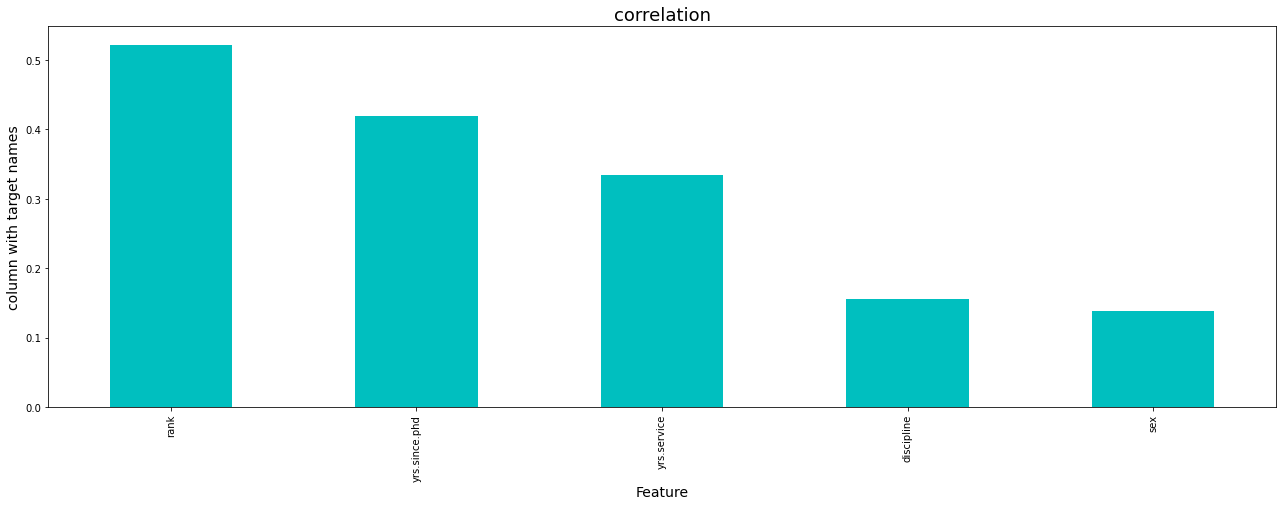

In [63]:
plt.figure(figsize=(22,7))
df.corr()['salary'].sort_values(ascending=False).drop(['salary']).plot(kind='bar' ,color='c')
plt.xlabel('Feature' ,fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [64]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

# Outliers checking

In [66]:
df.dtypes

rank             float64
discipline       float64
yrs.since.phd      int64
yrs.service        int64
sex              float64
salary             int64
dtype: object

<AxesSubplot:>

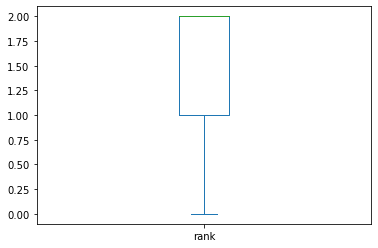

In [67]:
df['rank'].plot.box()

<AxesSubplot:>

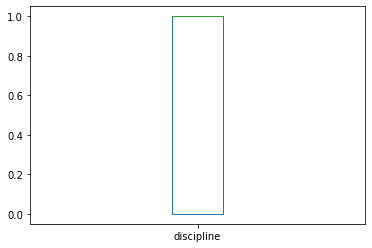

In [68]:
df['discipline'].plot.box()

<AxesSubplot:>

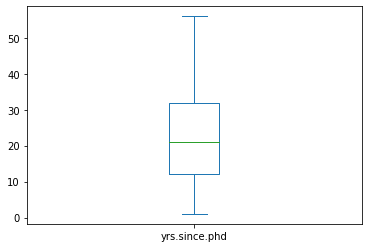

In [69]:
df['yrs.since.phd'].plot.box()

<AxesSubplot:>

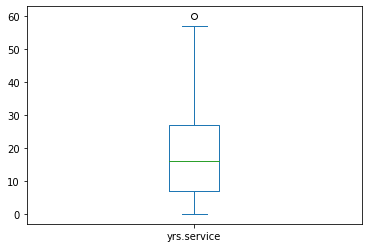

In [70]:
df['yrs.service'].plot.box()

<AxesSubplot:>

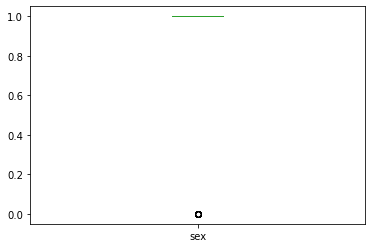

In [71]:
df['sex'].plot.box()

<AxesSubplot:>

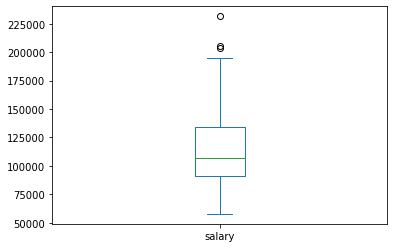

In [72]:
df['salary'].plot.box()

# Considering the outliers removal

In [73]:
df.shape

(397, 6)

In [74]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
        103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
        230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
        341, 358, 361, 364], dtype=int64),
 array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5],
       dtype=int64))

In [75]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


In [76]:
df_new_z.shape

(354, 6)

In [77]:
Data_loss=((397-354)/397)*100

In [78]:
Data_loss

10.831234256926953

# Separating the columns into features and target

In [79]:
features=df.drop("salary",axis=1)
target=df["salary"]

# Scaling the data using Min-max scalar

In [81]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [83]:
import warnings
warnings.filterwarnings('ignore')

In [85]:
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f"At random state {i},the training accuracy is :- {r2_score(target_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is :- {r2_score(target_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is :- 0.3611999954853077
At random state 0,the testing accuracy is :- 0.4079258314975236


At random state 1,the training accuracy is :- 0.3604245854198438
At random state 1,the testing accuracy is :- 0.41633641876629457


At random state 2,the training accuracy is :- 0.37547390964955596
At random state 2,the testing accuracy is :- 0.3600189554526694


At random state 3,the training accuracy is :- 0.3847313825130595
At random state 3,the testing accuracy is :- 0.3293529875010861


At random state 4,the training accuracy is :- 0.38517450334380465
At random state 4,the testing accuracy is :- 0.304400813331562


At random state 5,the training accuracy is :- 0.3950033630150771
At random state 5,the testing accuracy is :- 0.2752907752774737


At random state 6,the training accuracy is :- 0.3650308031752799
At random state 6,the testing accuracy is :- 0.40189870806075667


At random state 7,the training accuracy is :- 0.3575963886324032
At random state

At random state 81,the training accuracy is :- 0.35513373474139565
At random state 81,the testing accuracy is :- 0.4149346606972968


At random state 82,the training accuracy is :- 0.37417707170637116
At random state 82,the testing accuracy is :- 0.35099796023731


At random state 83,the training accuracy is :- 0.377726947712559
At random state 83,the testing accuracy is :- 0.3236720737678672


At random state 84,the training accuracy is :- 0.38401378181768164
At random state 84,the testing accuracy is :- 0.3127841540168671


At random state 85,the training accuracy is :- 0.376142718876315
At random state 85,the testing accuracy is :- 0.3500612740886736


At random state 86,the training accuracy is :- 0.3767878645972712
At random state 86,the testing accuracy is :- 0.3444389459787981


At random state 87,the training accuracy is :- 0.386606834116077
At random state 87,the testing accuracy is :- 0.2295416451299277


At random state 88,the training accuracy is :- 0.3555900942301574
At ra

In [86]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=12)

In [87]:
lr.fit(features_train,target_train)

LinearRegression()

In [88]:
pred_test=lr.predict(features_test)

In [89]:
print(r2_score(target_test,pred_test))

0.34397033297856505


# Crosss-validation of the model

In [91]:
Train_accuracy=r2_score(target_train,pred_train)
Test_accuracy=r2_score(target_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,features,target,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.3270801167406512 and accuracy score for training is -0.29698823968926513 and accuracy for the testing is 0.34397033297856505


At cross fold 3 the cv score is 0.3203328673059879 and accuracy score for training is -0.29698823968926513 and accuracy for the testing is 0.34397033297856505


At cross fold 4 the cv score is 0.3218196693768362 and accuracy score for training is -0.29698823968926513 and accuracy for the testing is 0.34397033297856505


At cross fold 5 the cv score is 0.29569928663871775 and accuracy score for training is -0.29698823968926513 and accuracy for the testing is 0.34397033297856505


At cross fold 6 the cv score is 0.33096341839295546 and accuracy score for training is -0.29698823968926513 and accuracy for the testing is 0.34397033297856505


At cross fold 7 the cv score is 0.3257704419996536 and accuracy score for training is -0.29698823968926513 and accuracy for the testing is 0.34397033297856505


At cross fold 8 the cv score is 

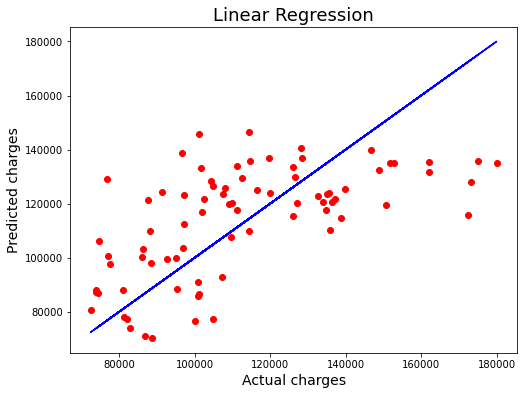

In [93]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=target_test, y=pred_test, color='r')
plt.plot(target_test,target_test, color='b')
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('Predicted charges',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

# Regularization

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [97]:
from sklearn.linear_model import Lasso

parameters = {'alpha' :[.0001, .001, .01, .1, 1, 10], 'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [98]:
ls = Lasso(alpha=1,random_state=0)
ls.fit(features_train,target_train)
ls.score(features_train,target_train)
pred_ls = ls.predict(features_test)

lss = r2_score(target_test,pred_ls)
lss

0.34396037220932285

In [99]:
cv_score=cross_val_score(ls,features,target,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.29570517244481875

# Ensemble technique

In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse', 'mae'],'max_features':["auto", "sqrt", "log2"]}
rf =RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'log2'}


In [102]:
rf= RandomForestRegressor(criterion="mae",max_features="log2")
rf.fit(features_train, target_train)
rf.score(features_train, target_train)
pred_decision = rf.predict(features_test)

rfs = r2_score(target_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,features,target,cv=5)
rfc = rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score: 33.24054455809694
Cross Val Score: 29.204720313434056


# We are getting model accuracy 33.24% and cross validation 29.20%

In [103]:
import pickle
filename = 'salary.pkl'
pickle.dump(rf, open(filename, 'wb'))